### Take at least 100 images per class with at least 3 classes using your phone/camera (e.g. take photos of different types of trees, flowers or animals). Display 5 examples from each class.

In [ ]:
import zipfile
import os
zipfile.ZipFile('Shoes.zip', 'r').extractall()
zipfile.ZipFile('T-shirts.zip', 'r').extractall()
zipfile.ZipFile('bottoms.zip', 'r').extractall()

**100 images per 3 classes have been created**

In [ ]:
# Specify the paths to your classes
shoes_folder = 'Shoes/Shoes/'
bottoms_folder = 'jeansnum/'
tshirts_folder = 'T-shirts/'

# Function to count the number of images in a folder
def count_images(folder):
    return len([f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))])

# Count the number of images in each class
shoes_count = count_images(shoes_folder)
bottoms_count = count_images(bottoms_folder)
tshirts_count = count_images(tshirts_folder)

# Display information about the dataset
print(f"Total Classes: 3")
print(f"Class: Shoes - Number of Images: {shoes_count}")
print(f"Class: Bottoms - Number of Images: {bottoms_count}")
print(f"Class: T-shirts - Number of Images: {tshirts_count}")
print(f"Total Images: {shoes_count + bottoms_count + tshirts_count}")


Total Classes: 3
Class: Shoes - Number of Images: 100
Class: Bottoms - Number of Images: 100
Class: T-shirts - Number of Images: 100
Total Images: 300


- We gathered the data by capturing individual images for three distinct classes. Subsequently, we consolidated these images into separate folders for Shoes, Bottoms, and T-shirts.
- Employing the provided code, we aimed to quantify the total number of images within each class folder.
- After execution, the results confirmed that each class contained precisely 100 images, meeting our desired criteria. Consequently, the overall dataset was composed of a total of 300 images, distributed evenly among the three classes.

**Displaying 5 images from each class**

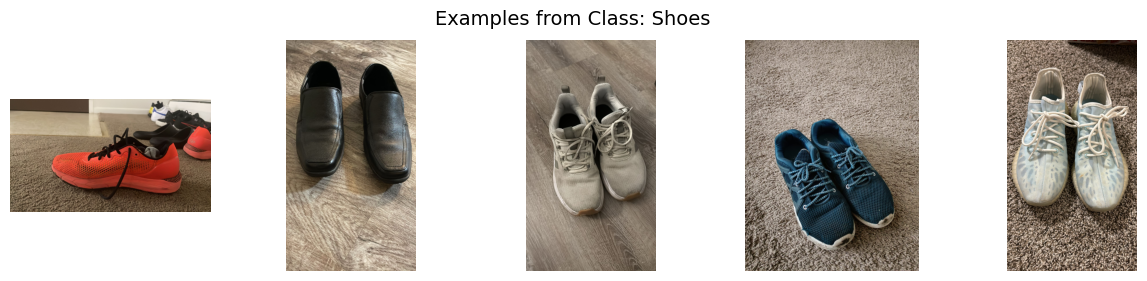

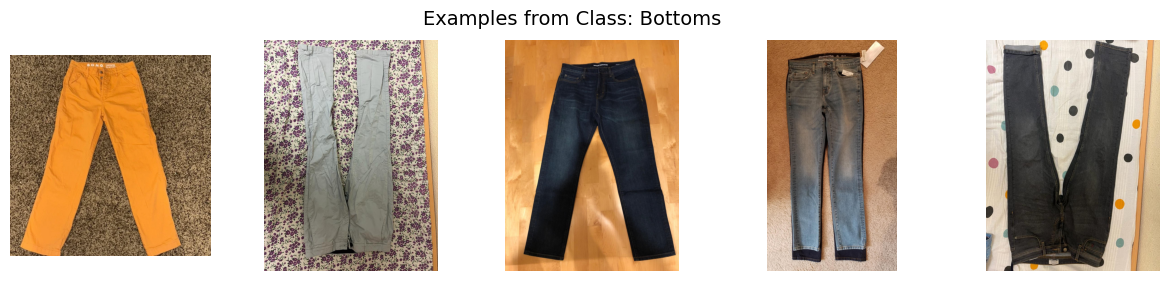

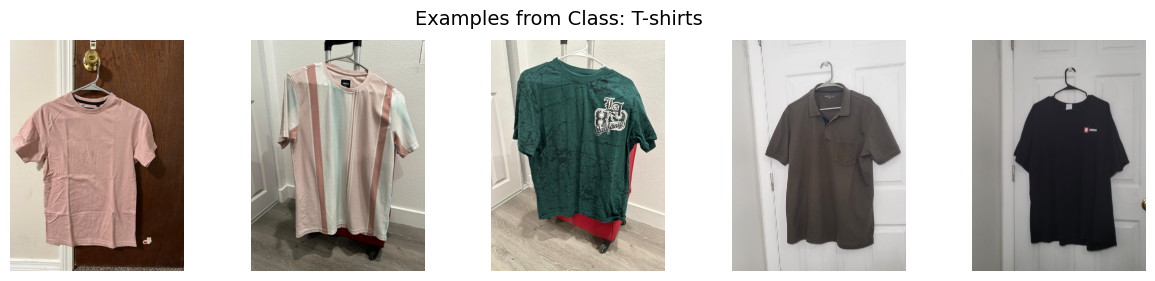

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_random_images(class_folder, class_name, num_images=5):
    images = os.listdir(class_folder)
    selected_images = random.sample(images, min(num_images, len(images)))

    plt.figure(figsize=(15, 3))
    plt.suptitle(f"Examples from Class: {class_name}", fontsize=14)

    for i, image_name in enumerate(selected_images, 1):
        image_path = os.path.join(class_folder, image_name)
        plt.subplot(1, num_images, i)
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.axis('off')

# Display 5 random images from each class
display_random_images(shoes_folder, 'Shoes')
display_random_images(bottoms_folder, 'Bottoms')
display_random_images(tshirts_folder, 'T-shirts')

plt.show()


- We have effectively showcased images from three distinct classes: Shoes, Bottoms, and T-shirts.

 ### Split the images into a training set, a validation set, and a test set.


In [ ]:
from sklearn.model_selection import train_test_split
import shutil

# Specify the paths for the train, validation, and test sets
train_folder = 'dataset/training_data/'
val_folder = 'dataset/val/'
test_folder = 'dataset/test_data/'

# Function to create folders if they don't exist
def create_folder(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

# Create train, validation, and test folders
create_folder(train_folder)
create_folder(val_folder)
create_folder(test_folder)

# Function to split images into train, validation, and test sets
def split_images(class_folder, class_name):
    images = os.listdir(class_folder)

    # Split the images
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    train_images, val_images = train_test_split(train_images, test_size=0.2, random_state=42)

    # Create subfolders for each class in train, val, and test folders
    create_folder(os.path.join(train_folder, class_name))
    create_folder(os.path.join(val_folder, class_name))
    create_folder(os.path.join(test_folder, class_name))

    # Move images to corresponding folders
    for image_name in train_images:
        shutil.copy(os.path.join(class_folder, image_name), os.path.join(train_folder, class_name, image_name))

    for image_name in val_images:
        shutil.copy(os.path.join(class_folder, image_name), os.path.join(val_folder, class_name, image_name))

    for image_name in test_images:
        shutil.copy(os.path.join(class_folder, image_name), os.path.join(test_folder, class_name, image_name))

# Split images for each class
split_images(shoes_folder, 'Shoes')
split_images(bottoms_folder, 'Bottoms')
split_images(tshirts_folder, 'T-shirts')

- The dataset has been systematically partitioned into training, validation, and testing subsets, establishing a foundation for the development and evaluation of models.
-  Dedicated folders have been generated for each subset, ensuring a clear and organized structure for the training, testing, and validation datasets.

**Splitting Train and test data (80-20%), and again splitting training dataset into (80-20%)**

In [ ]:
def count_images_in_split(folder):
    classes = os.listdir(folder)
    for class_name in classes:
        class_path = os.path.join(folder, class_name)
        num_images = len(os.listdir(class_path))
        print(f"Class: {class_name} - Number of Images: {num_images}")

# Verify the number of images in each split for each class
print("Training Set:")
count_images_in_split('dataset/training_data/')

print("\nValidation Set:")
count_images_in_split('dataset/val/')

print("\nTest Set:")
count_images_in_split('dataset/test_data/')

Training Set:
Class: Bottoms - Number of Images: 64
Class: T-shirts - Number of Images: 64
Class: Shoes - Number of Images: 64

Validation Set:
Class: Bottoms - Number of Images: 16
Class: T-shirts - Number of Images: 16
Class: Shoes - Number of Images: 16

Test Set:
Class: Bottoms - Number of Images: 20
Class: T-shirts - Number of Images: 20
Class: Shoes - Number of Images: 20


- The classes have been appropriately distributed across the training, validation, and test sets, where the training and test set are first split in the ratio 0.8 and 0.2 respectively. Further, the training set is split into validation in the ratio 0.8 and 0.2 as well.

- This is crucial for preventing potential biases and ensuring that the model learns from a diverse set of examples during training, enhancing its ability to generalize to new, unseen data.

### Build the input pipeline, including the appropriate preprocessing operations, and add data augmentation.

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
# Specify the paths to your datasets
train_folder = 'dataset/training_data/'
val_folder = 'dataset/val/'
test_folder = 'dataset/test_data/'

# Define constants
batch_size = 32
image_size = (224, 224)


- Initially, we designated variables to store the paths leading to the training, validation, and test datasets.
- Subsequently, the assignment of a batch_size of 32 indicates that the model will process 32 samples in each iteration during training.
- The decision to resize input images to (224, 224) pixels is aimed at maintaining uniformity in the dimensions of the input data.
- These constants play a pivotal role in tailoring data pipelines and defining the architecture of the model throughout the training process.


**Building Input pipeline through data pre-processing and adding data augmentation**

In [ ]:
# Data loading and preprocessing for training set (Data Preprocessing)

train_datagen = ImageDataGenerator(
    rescale=1./255, # rescale pixel values to [0, 1] range
    rotation_range=20, # randomly rotate images by up to 20 degrees
    width_shift_range=0.2, # randomly shift images horizontally by up to 20%
    height_shift_range=0.2, # randomly shift images vertically by up to 10%
    shear_range=0.2, # randomly apply shearing transformations
    zoom_range=0.2, # randomly zoom in or out on images
    horizontal_flip=True, # randomly flip images horizontally
    fill_mode='nearest' # fill in missing pixels with the nearest available

)

# Only rescale for validation and test sets
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Input Pipeline for Training Set and adding Data Augmentation
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Input Pipeline for Validation Set and adding Data Augmentation
val_generator = val_datagen.flow_from_directory(
    val_folder,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Input Pipeline for Test Set and adding Data Augmentation
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 192 images belonging to 3 classes.
Found 48 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


- The provided code establishes a robust input pipeline by utilizing the ImageDataGenerator class for data preprocessing and augmentation.
- Data augmentation and pre-processing techniques, such as rotation, shifting, shearing, zooming, and flipping, are applied specifically to the training set, enhancing its diversity. The validation and test sets undergo pixel value rescaling only.
- The input pipelines are configured using the flow_from_directory method, ensuring that the images are loaded, resized, and batched appropriately for subsequent model training and evaluation.
- The output shows the number of images within each set belonging to their respective classes.

### Fine-tune a pretrained model of your choice on this dataset. Report classification accuracy and give a few examples of correct/incorrect classification (show a few images that were correctly/incorrectly classified).

**Fine tuning a pretrained model - ResNet50 and reporting classification accuracy**

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained ResNet50 model and replace the top layers for fine-tuning
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(3, activation='softmax')(x)  # Assuming you have 3 classes
classifier = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Freeze the base layers of the model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with an optimizer, loss function, and evaluation metric
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data with the validation data
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)
history = classifier.fit(train_generator, epochs=20, validation_data=val_generator)

# Evaluate the model on the test data
test_loss, test_accuracy = classifier.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# Predict the classes of the test data and plot some examples of correct and incorrect predictions
import numpy as np
import matplotlib.pyplot as plt

preds = classifier.predict(test_generator)
predicted_classes = np.argmax(preds, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
correct_indices = np.nonzero(predicted_classes == true_classes)[0]
incorrect_indices = np.nonzero(predicted_classes != true_classes)[0]

Epoch 1/20
6/6 [==============================] - 77s 12s/step - loss: 2.1125 - accuracy: 0.3281 - val_loss: 2.0055 - val_accuracy: 0.3125
Epoch 2/20
6/6 [==============================] - 69s 12s/step - loss: 1.5033 - accuracy: 0.3646 - val_loss: 1.4759 - val_accuracy: 0.3333
Epoch 3/20
6/6 [==============================] - 69s 11s/step - loss: 1.2759 - accuracy: 0.3594 - val_loss: 1.2573 - val_accuracy: 0.3958
Epoch 4/20
6/6 [==============================] - 60s 10s/step - loss: 1.0964 - accuracy: 0.4635 - val_loss: 1.1109 - val_accuracy: 0.4167
Epoch 5/20
6/6 [==============================] - 60s 9s/step - loss: 1.0066 - accuracy: 0.4792 - val_loss: 1.0384 - val_accuracy: 0.4167
Epoch 6/20
6/6 [==============================] - 69s 11s/step - loss: 0.9983 - accuracy: 0.5156 - val_loss: 1.0468 - val_accuracy: 0.5625
Epoch 7/20
6/6 [==============================] - 83s 14s/step - loss: 1.0086 - accuracy: 0.4531 - val_loss: 0.9494 - val_accuracy: 0.5625
Epoch 8/20
6/6 [============

- The provided code showcases the fine-tuning of a pre-trained ResNet50 model for a classification task involving three classes.
- After modifying the model architecture, the top layers are replaced, and the base layers are frozen. The model is compiled with the Adam optimizer and categorical crossentropy loss function, and training is conducted with early stopping based on validation accuracy.
- The final evaluation on the test data yields a test loss of 0.8265 and a test accuracy of 0.6167. Additionally, predictions are made on the test data, and correct and incorrect classifications are visualized further.

**Plotting training vs validation loss and accuracy plots**

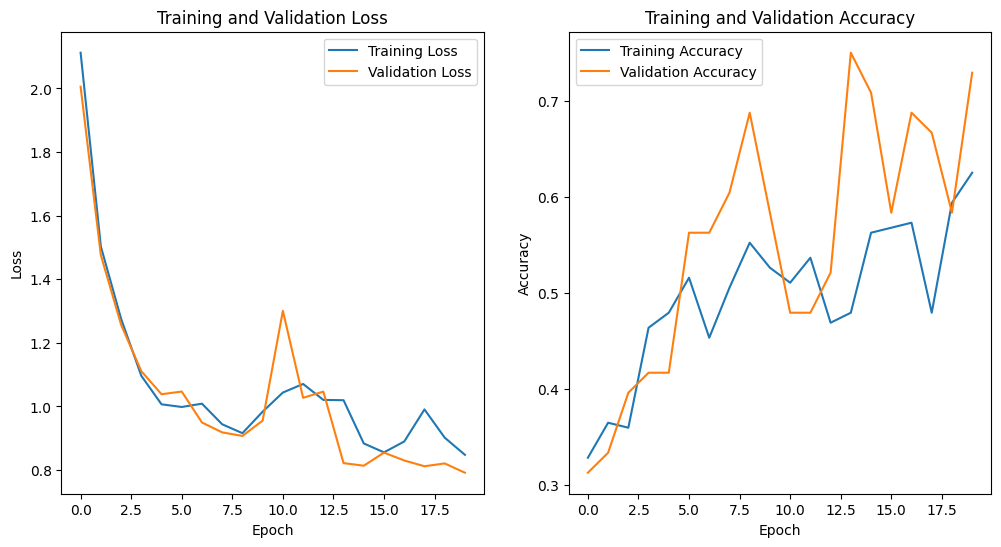

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Loss Plot Observation:**
As the number of epochs is increased to 50, a noticeable trend emerges in the training and validation loss. The training loss consistently diminishes in an exponential fashion. However, for the validation loss, there is an initial decrease up to a certain point, followed by a sudden increase before gradually decreasing again. This behavior aligns with the expected output when fine-tuning a pretrained ResNet 50 model.

**Accuracy Plot Observation:**
Analyzing the training versus validation accuracy plot reveals a general trend of improvement in both training and validation accuracy with an increase in the number of epochs. While there are instances where a temporary decrease occurs, the overall trajectory indicates a positive trend in accuracy over the course of training.

**Showing a few images that were correctly/incorrectly classified by the model**

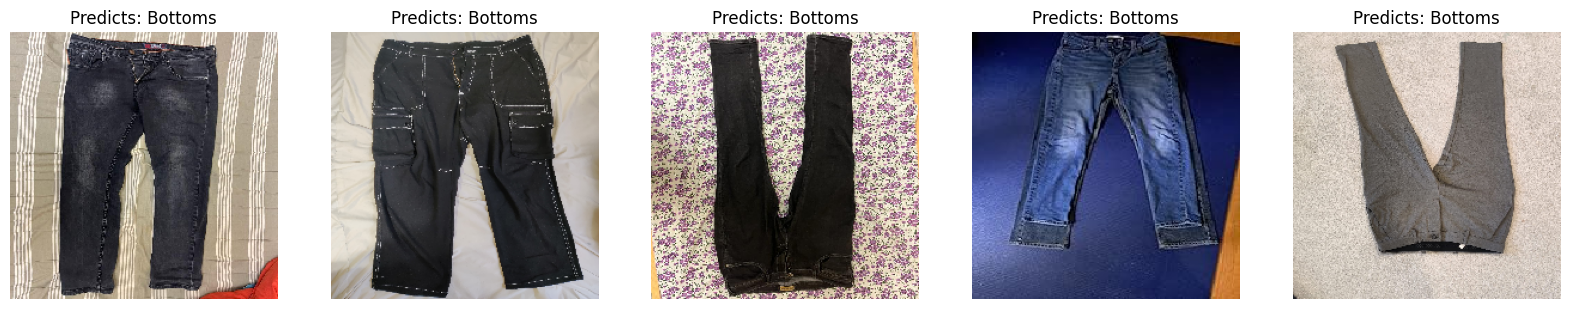

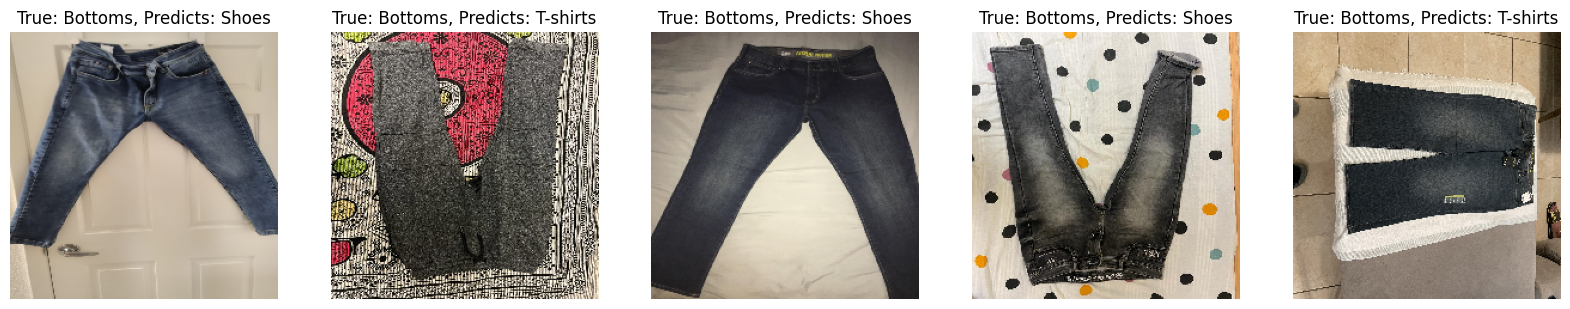

In [ ]:
# Plot some correctly classified images
fig, axs = plt.subplots(1, 5, figsize=(20, 15))
axs = axs.flatten()
for i in range(5):
    idx = correct_indices[i]
    img_path = test_generator.filepaths[idx]
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img = np.array(img)
    axs[i].imshow(img)
    axs[i].axis('off')
    true_class = class_labels[true_classes[idx]]
    axs[i].set_title('Predicts: {}'.format(true_class))

# Plot some incorrectly classified images
fig, axs = plt.subplots(1, 5, figsize=(20, 15))
axs = axs.flatten()
for i in range(5):
    idx = incorrect_indices[i]
    img_path = test_generator.filepaths[idx]
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img = np.array(img)
    axs[i].imshow(img)
    axs[i].axis('off')
    true_class = class_labels[true_classes[idx]]
    predicted_class = class_labels[predicted_classes[idx]]
    axs[i].set_title('True: {}, Predicts: {}'.format(true_class, predicted_class))

plt.show()


- The code visually presents two sets of images: one set that was correctly classified by the model and another set that was incorrectly classified.
- Each set consists of five images, displaying the true class of the images along with the predicted class.
- The purpose of these plots is to offer a qualitative assessment of the model's performance on specific examples from the test dataset.

### Train from scratch (without pretraining) a deep neural network that contains convolutional layers on this dataset. Report classification accuracy and give a few examples of correct/incorrect classification (show a few images that were correctly/incorrectly classified).

**Training a model from scratch - DNN containing convolutional layers and reporting classification accuracy**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

# Specify the paths to your datasets
train_folder = 'dataset/training_data/'
val_folder = 'dataset/val/'
test_folder = 'dataset/test_data/'

# Load and prepare training and validation datasets
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    val_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Define the model architecture
classifier = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
classifier.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = classifier.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Evaluate the model on the test set
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_acc = classifier.evaluate(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)

Found 192 images belonging to 3 classes.
Found 48 images belonging to 3 classes.
Epoch 1/20
6/6 [==============================] - 55s 9s/step - loss: 13.7416 - accuracy: 0.3854 - val_loss: 1.5114 - val_accuracy: 0.4792
Epoch 2/20
6/6 [==============================] - 42s 7s/step - loss: 0.9433 - accuracy: 0.5208 - val_loss: 1.1398 - val_accuracy: 0.5417
Epoch 3/20
6/6 [==============================] - 40s 6s/step - loss: 0.6534 - accuracy: 0.7448 - val_loss: 0.6795 - val_accuracy: 0.6875
Epoch 4/20
6/6 [==============================] - 40s 6s/step - loss: 0.4117 - accuracy: 0.8385 - val_loss: 0.8852 - val_accuracy: 0.7708
Epoch 5/20
6/6 [==============================] - 38s 6s/step - loss: 0.3994 - accuracy: 0.8281 - val_loss: 0.4496 - val_accuracy: 0.8542
Epoch 6/20
6/6 [==============================] - 45s 7s/step - loss: 0.3176 - accuracy: 0.8750 - val_loss: 0.5370 - val_accuracy: 0.7708
Epoch 7/20
6/6 [==============================] - 43s 6s/step - loss: 0.2601 - accuracy: 0

- The code above trains a deep neural network from scratch without pretraining on the given dataset.
- The model, consisting of convolutional layers, is compiled and trained using data augmentation. After training, the model is evaluated on the test set, and the test accuracy is reported.

**Model summary - CNN**

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense_2 (Dense)             (None, 512)               9

1. **Convolutional Layer (conv2d):**
   - The first convolutional layer with 32 filters, each of size (3, 3). It processes the input images, resulting in feature maps with a spatial resolution of 222x222.

2. **MaxPooling2D Layer (max_pooling2d):**
  -  Max pooling is applied to reduce the spatial dimensions by half (111x111) after the first convolutional layer.

3. **Convolutional Layer (conv2d_1):**
   - The second convolutional layer with 64 filters, each of size (3, 3). It processes the feature maps from the previous layer, further capturing hierarchical features.

4. **MaxPooling2D Layer (max_pooling2d_1):**
   - Max pooling is applied again, reducing the spatial dimensions to 54x54.

5. **Flatten Layer (flatten):**
   - Flattens the 3D output to a 1D array, preparing the data for dense layers.

6. **Dense Layer (dense_2):**
   -  A fully connected layer with 512 units, applying the rectified linear unit (ReLU) activation function.

7. **Dense Layer (dense_3):**
   - The final dense layer with 3 units (equal to the number of output classes), applying the softmax activation function for multi-class classification.

**Total Parameters:**
- Total Trainable Parameters: 95,572,931
- Non-trainable Parameters: 0

**Summary:**
- The model follows a convolutional neural network (CNN) architecture, starting with convolutional and max pooling layers to capture hierarchical features.
- The dense layers at the end enable the network to make predictions for the given classification task.
- The high number of trainable parameters indicates the complexity of the model, which may be suitable for tasks with sufficient labeled data.


**Evaluating model accuracy**

In [ ]:
test_loss, test_acc = classifier.evaluate(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)

2/2 [==============================] - 6s 2s/step - loss: 1.6829 - accuracy: 0.7667
Test accuracy: 0.7666666507720947


**Plotting training and validation loss vs accuracy loss**

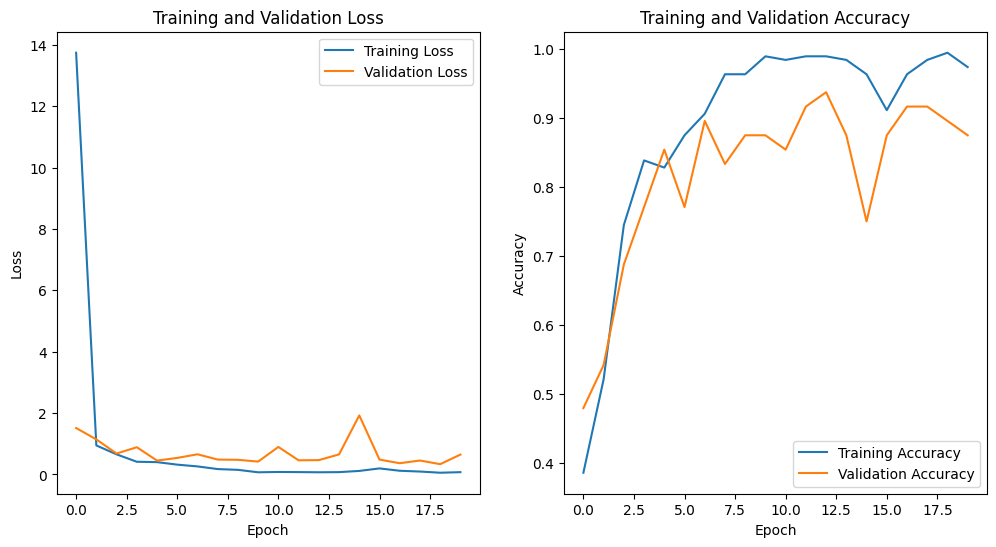

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Loss Plot Observation:**
The training versus validation loss plot for the CNN model illustrates a consistent exponential decrease in both the training and validation sets with an increasing number of epochs. This trend suggests that the model is effectively fitting the data, showcasing a favorable learning process.

**Accuracy Plot Observation:**
Examining the accuracy plot for the CNN model demonstrates a prevailing pattern of enhancement in both training and validation accuracy as the number of epochs rises. Although occasional dips are observed, the overall trajectory suggests a positive inclination in accuracy throughout the training process.

**Showing a few images that were correctly/incorrectly classified by the model**

2/2 [==============================] - 4s 1s/step


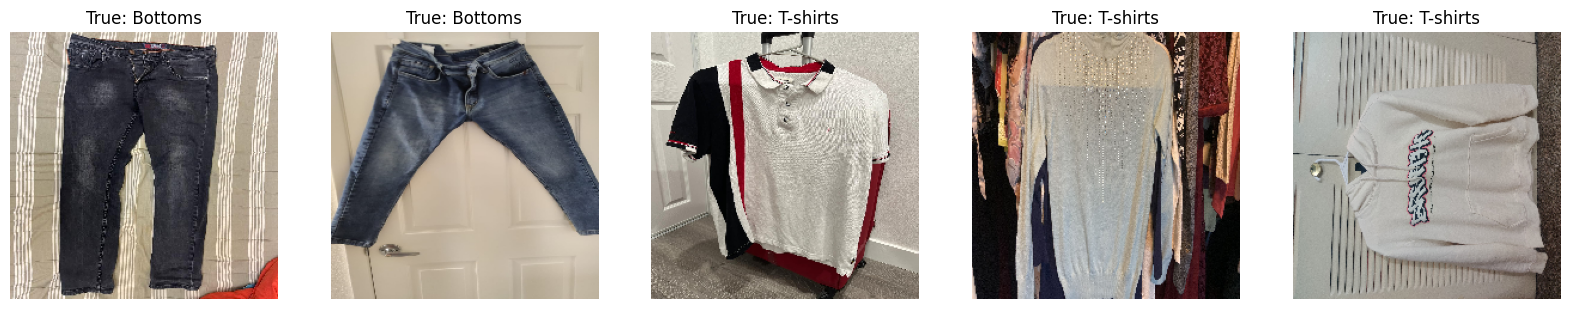

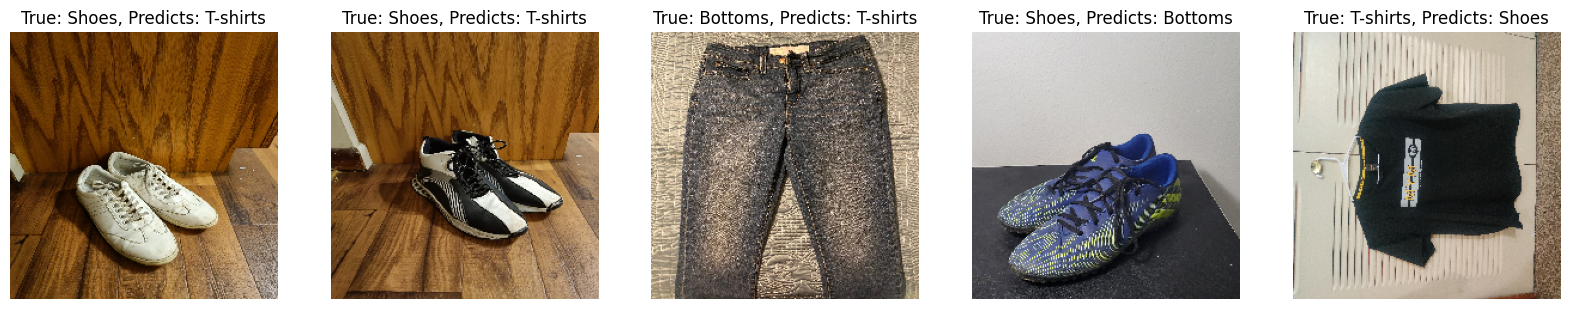

In [ ]:
import random

# Predictions
preds = classifier.predict(test_generator)
predicted_classes = np.argmax(preds, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

correct_indices = np.where(predicted_classes == true_classes)[0]
incorrect_indices = np.where(predicted_classes != true_classes)[0]

# Select random indices for correctly classified images
random_correct_indices = random.sample(list(correct_indices), min(5, len(correct_indices)))

# Select random indices for incorrectly classified images
random_incorrect_indices = random.sample(list(incorrect_indices), min(5, len(incorrect_indices)))

# Plot some random correctly classified images
fig, axs = plt.subplots(1, 5, figsize=(20, 15))
axs = axs.flatten()
for i, idx in enumerate(random_correct_indices):
    img_path = test_generator.filepaths[idx]
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img = np.array(img)
    axs[i].imshow(img)
    axs[i].axis('off')
    true_class = class_labels[true_classes[idx]]
    axs[i].set_title('True: {}'.format(true_class))

# Plot some random incorrectly classified images
fig, axs = plt.subplots(1, 5, figsize=(20, 15))
axs = axs.flatten()
for i, idx in enumerate(random_incorrect_indices):
    img_path = test_generator.filepaths[idx]
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img = np.array(img)
    axs[i].imshow(img)
    axs[i].axis('off')
    true_class = class_labels[true_classes[idx]]
    predicted_class = class_labels[predicted_classes[idx]]
    axs[i].set_title('True: {}, Predicts: {}'.format(true_class, predicted_class))

plt.show()


- Correctly Classified Images:
Five randomly chosen images that were correctly classified by the model are shown. Each image is accompanied by its true class label.

- Incorrectly Classified Images:
Five randomly selected images that were incorrectly classified by the model are displayed. For each image, both the true class label and the class predicted by the model are shown.

This visualization allows for a qualitative assessment of the model's performance by inspecting a subset of both correct and incorrect predictions. It provides a glimpse into how well the model generalizes to different instances in the test set and identifies areas for potential improvement or fine-tuning.

**Conclusion**

1. It can be concluded from the above performed tasks that training a model from scratch (CNN) takes too much of time, but with respect to this case, it beats the pre-trained model (ResNet50) in terms of test accuracy.

2. The use of data augmentation in the input pipeline contributed to better model generalization and robustness.

3. Collecting a larger dataset could significantly improve the performance of the model trained from scratch.

4. Experimenting with different pretrained models and hyperparameter tuning could further enhance the performance of the transfer learning approach. Exploring additional techniques, such as ensemble learning or model stacking could help as well.

